# Notebook objective:
- To predict the number shown on an image using a model trained on the MNIST dataset

# Contents:
1. Import packages
2. Get data and view it
3. Turn input data into right format for model training
4. Get model from previous project and train model
5. Plot performance metrics
6. Predict 10 images

# 1. Import packages

In [115]:
import tensorflow as tf
print("Tensorflow version is", tf.__version__)
import pandas as pd
print("pandas version is", pd.__version__)
import numpy as np
print("numpy version is", np.__version__)
import scipy
print("scipy version is", scipy.__version__)
import PIL
print("PIL version is", PIL.__version__)
import tensorflow_datasets as tfds
print("tensorflow_datasets version is", tfds.__version__)

import os
from tensorflow import keras
import matplotlib.pyplot
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

Tensorflow version is 2.7.0
pandas version is 1.3.4
numpy version is 1.21.4
scipy version is 1.7.3
PIL version is 8.4.0
tensorflow_datasets version is 4.4.0


# 2. Get data and view it

In [116]:
# Download data into a folder
# Load the data

# Append data/mnist.npz to the previous path to get the full path
data_path = '/home/jaimeggbfp/PycharmProjects/TestingBaseInt/data/mnist.npz'

# Get only training set
(training_images, training_labels), (validation_images, validation_labels) = tf.keras.datasets.mnist.load_data(path=data_path)

# Describe data
- images of fashion items
- training_images.shape: (60000, 28, 28); training_labels.shape: (60000,)
- Labels are sparse categorical
- what to do to make it training ready? ---> rescale dividing by 255. augment. put into flow()

# 3. Turn input data into right format for training

In [117]:
# ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (60000, 28, 28))
training_images= tf.expand_dims(training_images, axis=-1); print(training_images.shape)
validation_images= tf.expand_dims(validation_images, axis=-1)

training_data = ImageDataGenerator(rescale=1/255,
                                   rotation_range= 40,
                                   width_shift_range= 0.2,
                                   height_shift_range= 0.2,
                                   shear_range= 0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest',
                                   horizontal_flip=True
                                   ).flow(x= training_images,
                                          y= training_labels,
                                          batch_size= 32)

# Remember, validation data should not be augmented
validation_data = ImageDataGenerator(rescale=1/255
                                   ).flow(x= validation_images,
                                          y= validation_labels,
                                          batch_size= 32)

(60000, 28, 28, 1)


# 4. Get model from previous project and train model

In [118]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',  # use sparse when labels are integers, and use plain categorical when labels are one hot encoded
            metrics=['acc'])

In [119]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.995:
            print('\nReached 99.5% accuracy so cancelling training!')
            self.model.stop_training = True

callback = myCallback()

In [120]:
history= model.fit(x=training_data,
                   validation_data=validation_data,
                   epochs= 15,
                   verbose=1,
                   callbacks=[callback])

Epoch 1/15
1875/1875 [==============================] - 24s 12ms/step - loss: 0.7637 - acc: 0.7424 - val_loss: 0.1943 - val_acc: 0.9379
Epoch 2/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3457 - acc: 0.8896 - val_loss: 0.1917 - val_acc: 0.9342
Epoch 3/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2735 - acc: 0.9134 - val_loss: 0.1815 - val_acc: 0.9408
Epoch 4/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2313 - acc: 0.9273 - val_loss: 0.0906 - val_acc: 0.9699
Epoch 5/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2127 - acc: 0.9327 - val_loss: 0.1162 - val_acc: 0.9597
Epoch 6/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1917 - acc: 0.9391 - val_loss: 0.0901 - val_acc: 0.9706
Epoch 7/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1811 - acc: 0.9425 - val_loss: 0.1295 - val_acc: 0.9553
Epoch 8/15
1875/1875 [==========================

# 5. Plot performance metrics

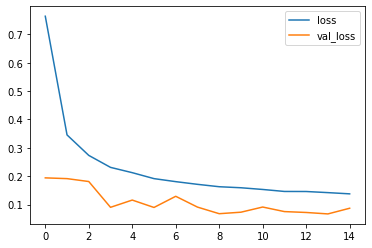

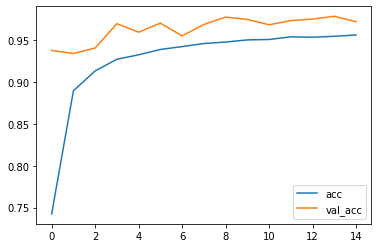

In [121]:
plt.figure()
plt.plot(history.history['loss'], label= 'loss' )
plt.plot(history.history['val_loss'], label= 'val_loss' )
plt.legend()

plt.figure()
plt.plot(history.history['acc'], label= 'acc' )
plt.plot(history.history['val_acc'], label= 'val_acc' )
plt.legend()

# 6. Predict 10 images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(28, 28, 3)
(28, 28, 3)


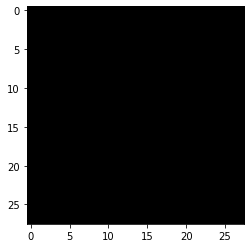

(28, 28, 1)


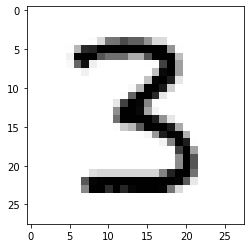

(1, 28, 28, 1)
3
3


In [123]:
image_path = '/home/jaimeggbfp/PycharmProjects/TestingBaseInt/data/number3.png'
img_PIL = image.load_img(image_path, target_size=(28,28))
img_arr = image.img_to_array(img_PIL); print(img_arr.shape)
img_disp = tf.keras.utils.array_to_img(img_arr); print(img_arr.shape)
img_res = img_arr / -255                           # REMEMBER TO RESCALE, OTHERWISE YOU'LL ALWAYS PREDICT 1s

plt.imshow(img_res)
plt.show()

img_gra = tf.image.rgb_to_grayscale(img_res); print(img_gra.shape)
plt.imshow(img_gra, cmap="Greys_r")
plt.show()

img_ten = np.expand_dims(img_gra, axis=0); print(img_ten.shape)         # model wants a 4D tensor
pred_idx = np.argmax(model(img_ten), axis=-1)[0]; print(pred_idx); print(pred_idx)